In [1]:
import pandas as pd
import numpy as np

In [2]:
from pandas_datareader import data, wb

In [4]:
import datetime
%matplotlib inline
import os

In [6]:
#df = data.get_data_tiingo('GOOG', api_key=os.getenv('TIINGO_API_KEY'))

In [10]:
import pandas_datareader.data as wb
from datetime import datetime

In [31]:
start = datetime(2006, 1, 1)
end = datetime(2016, 1, 1)
BAC = wb.DataReader('BAC', 'yahoo', start, end)
C = wb.DataReader('C', 'yahoo', start, end)
GS = wb.DataReader('GS', 'yahoo', start, end)
JPM = wb.DataReader('JPM', 'yahoo', start, end)
MS = wb.DataReader('MS', 'yahoo', start, end)
WFC = wb.DataReader('WFC', 'yahoo', start, end)

In [33]:
#WFC.head()

In [34]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [35]:
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [44]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 'columns', keys = tickers)

In [47]:
bank_stocks.head(2)

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.298687   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.923801   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   

                                                WFC                     \
                Close     Volume  Adj Close    High     Low       Open   
Date                                                                     
2006-01-03  58.310001  5377000.0  37.429329  31.975  31.195  31.600000   
2006-01-04  58.349998  7977800.0  37.455013  31.820  31.365  31.799999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.408512  
2006-01-04  31.530001  10870000.0  20.171795  

[2 rows x 36 columns]

In [48]:
bank_stocks.columns.names = [' Bank Ticker', 'Stock Info']

In [49]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info         High        Low       Open      Close      Volume   
Date                                                                   
2006-01-03    47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04    47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05    46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06    46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09    46.970001  46.360001  46.720001  46.599998  15619400.0   

 Bank Ticker                      C                                      ...  \
Stock Info    Adj Close        High         Low        Open       Close  ...   
Date                                                                     ...   
2006-01-03    35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04    34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05    34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06    34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09    34.938789  487.399994  483.000000  486.000000  483.899994  ...   

 Bank Ticker         MS                                         WFC  \
Stock Info         Open      Close     Volume  Adj Close       High   
Date                                                                  
2006-01-03    57.169998  58.310001  5377000.0  37.429329  31.975000   
2006-01-04    58.700001  58.349998  7977800.0  37.455013  31.820000   
2006-01-05    58.549999  58.509998  5778000.0  37.557716  31.555000   
2006-01-06    58.770000  58.570000  6889800.0  37.596241  31.775000   
2006-01-09    58.630001  59.189999  4144500.0  37.994202  31.825001   

 Bank Ticker                                                          
Stock Info          Low       Open      Close      Volume  Adj Close  
Date                                                                  
2006-01-03    31.195000  31.600000  31.900000  11016400.0  20.408512  
2006-01-04    31.365000  31.799999  31.530001  10870000.0  20.171795  
2006-01-05    31.309999  31.500000  31.495001  10158000.0  20.149401  
2006-01-06    31.385000  31.580000  31.680000   8403800.0  20.267757  
2006-01-09    31.555000  31.674999  31.674999   5619600.0  20.264565  

[5 rows x 36 columns]

# Multi Index object

In [50]:
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
         ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

In [53]:
tuples = list(zip(*arrays))

In [54]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [55]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [56]:
s = pd.Series(np.random.randn(8), index =index)

In [57]:
s

first  second
bar    one       0.709921
       two       0.849943
baz    one      -0.248683
       two       0.965089
foo    one      -0.457340
       two      -0.384915
qux    one       0.460005
       two       1.879464
dtype: float64

In [58]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info         High        Low       Open      Close      Volume   
Date                                                                   
2006-01-03    47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04    47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05    46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06    46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09    46.970001  46.360001  46.720001  46.599998  15619400.0   

 Bank Ticker                      C                                      ...  \
Stock Info    Adj Close        High         Low        Open       Close  ...   
Date                                                                     ...   
2006-01-03    35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04    34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05    34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06    34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09    34.938789  487.399994  483.000000  486.000000  483.899994  ...   

 Bank Ticker         MS                                         WFC  \
Stock Info         Open      Close     Volume  Adj Close       High   
Date                                                                  
2006-01-03    57.169998  58.310001  5377000.0  37.429329  31.975000   
2006-01-04    58.700001  58.349998  7977800.0  37.455013  31.820000   
2006-01-05    58.549999  58.509998  5778000.0  37.557716  31.555000   
2006-01-06    58.770000  58.570000  6889800.0  37.596241  31.775000   
2006-01-09    58.630001  59.189999  4144500.0  37.994202  31.825001   

 Bank Ticker                                                          
Stock Info          Low       Open      Close      Volume  Adj Close  
Date                                                                  
2006-01-03    31.195000  31.600000  31.900000  11016400.0  20.408512  
2006-01-04    31.365000  31.799999  31.530001  10870000.0  20.171795  
2006-01-05    31.309999  31.500000  31.495001  10158000.0  20.149401  
2006-01-06    31.385000  31.580000  31.680000   8403800.0  20.267757  
2006-01-09    31.555000  31.674999  31.674999   5619600.0  20.264565  

[5 rows x 36 columns]

In [70]:
bank_stocks.xs(key = 'Close',axis = 1,level='Stock Info').max()

 Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [123]:
returns = pd.DataFrame()
return2 = pd.DataFrame()

In [125]:
for tick in tickers:
    return2[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
return2.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [91]:
newData = pd.DataFrame()

In [95]:
for t in tickers:
    newData[t+' Return'] = bank_stocks[t]['Close'].pct_change()

    
newData.head()
    

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


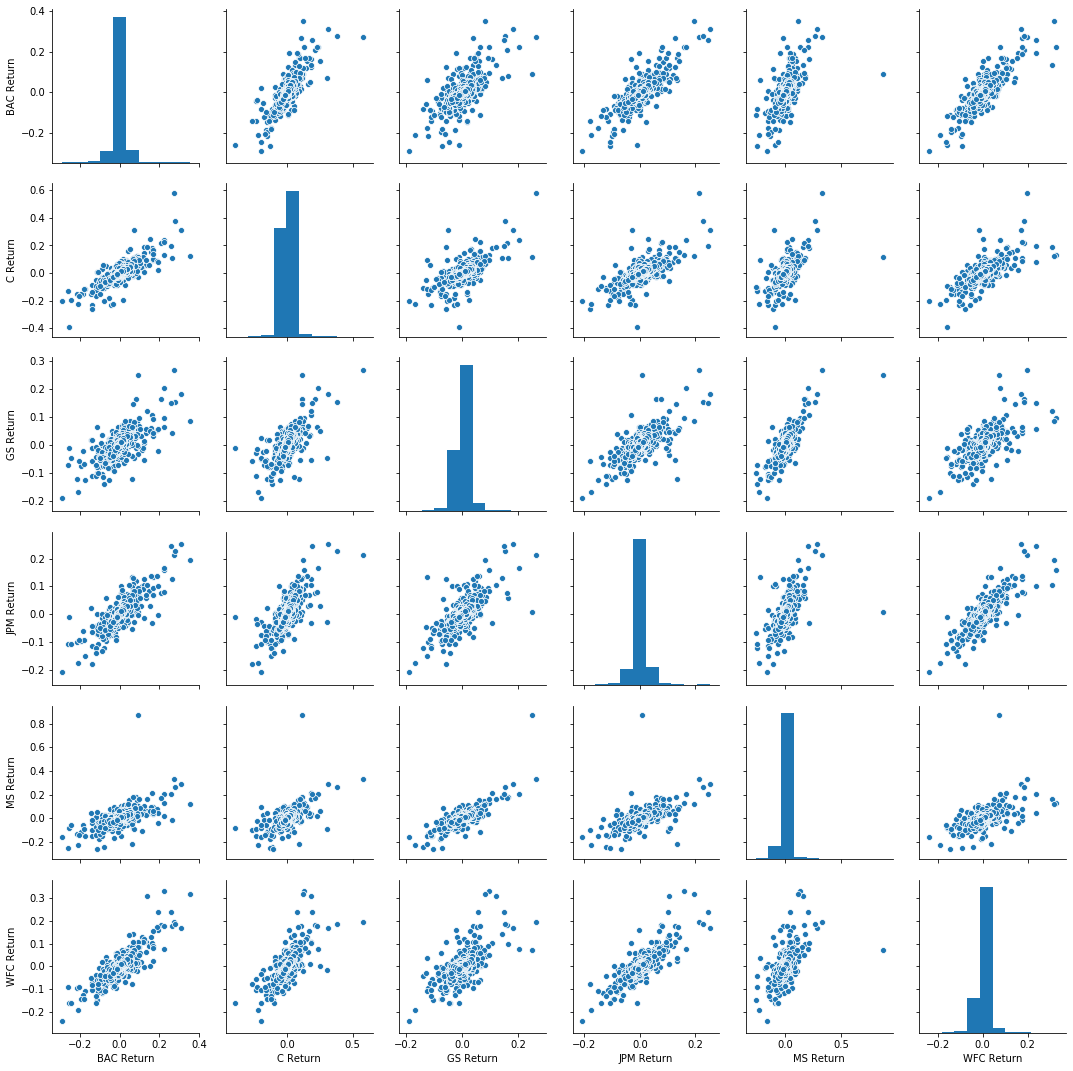

In [97]:
import seaborn as sns

sns.pairplot(newData)

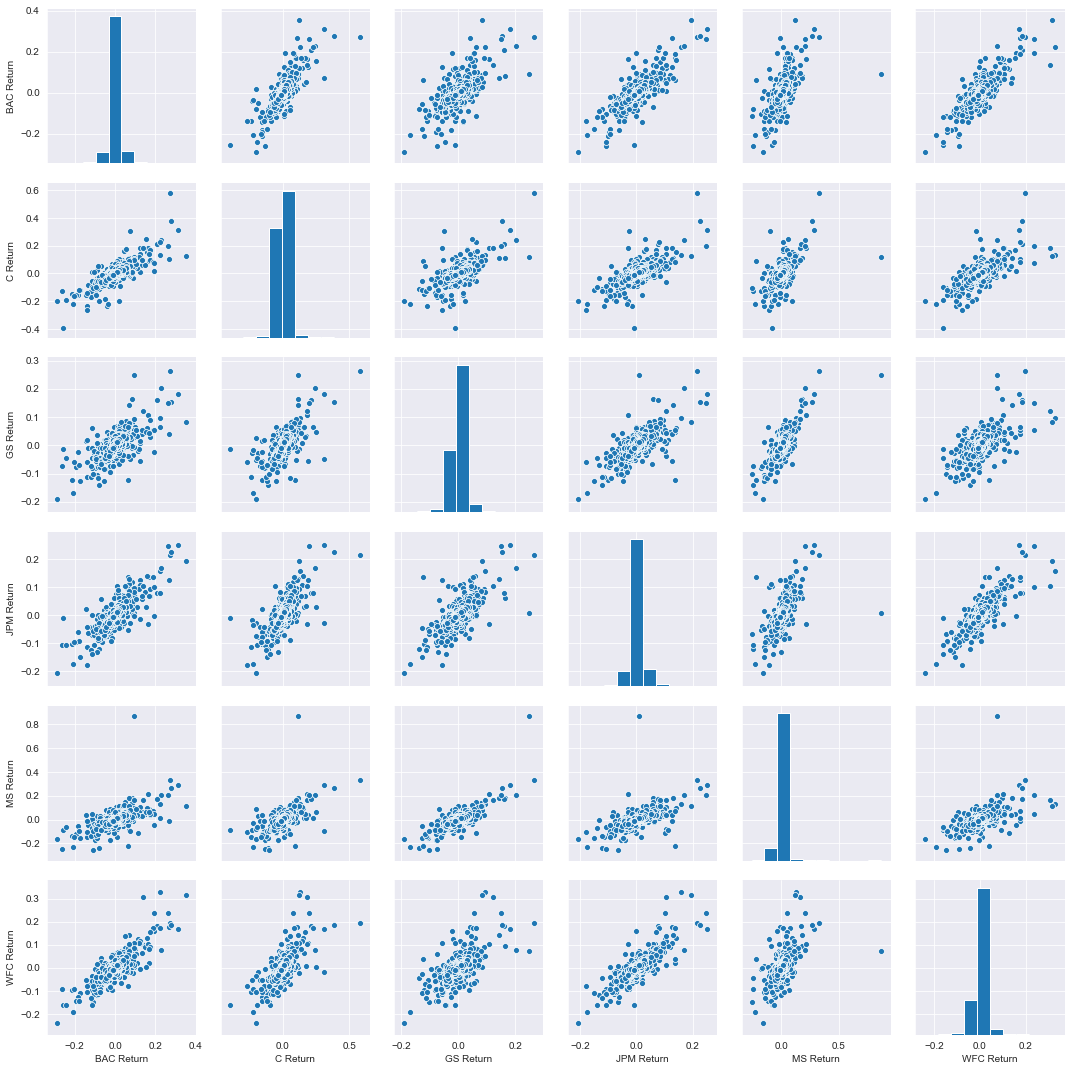

In [106]:
sns.set_style('darkgrid')
sns.pairplot(newData[1:])

In [126]:
return2.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


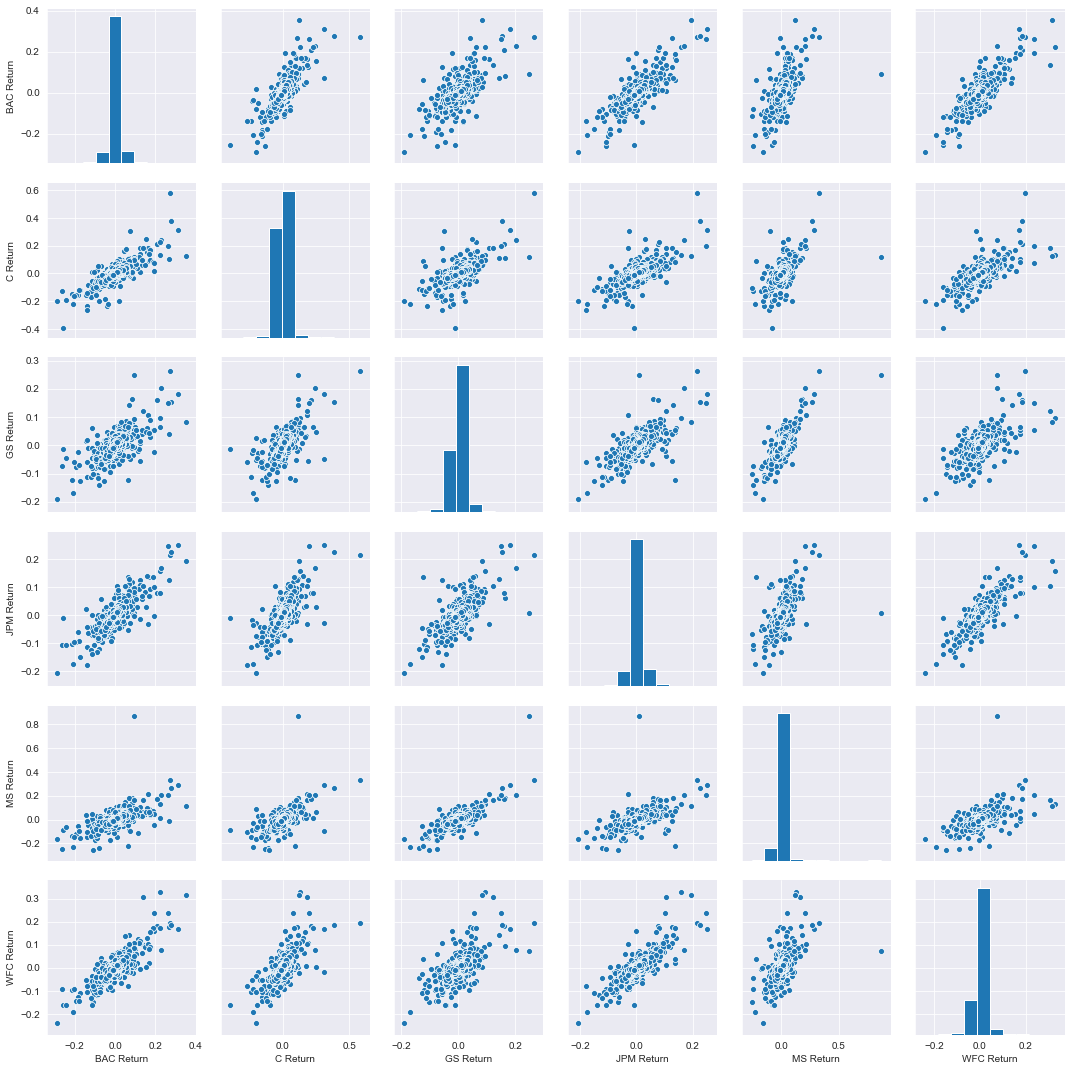

In [128]:
sns.pairplot(return2[1:])

In [107]:
newData.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [110]:
newData.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [129]:
return2.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [131]:
newData.std() #entire time period is Citi bank

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [140]:
#newData.ix['2006-01-05']

In [145]:
newData.ix['2015-01-01':'2015-12-31'].std() # riskiest for year 2015

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


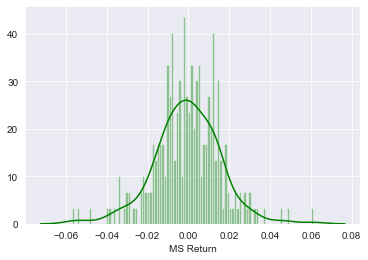

In [155]:
sns.distplot(newData.ix['2015-01-01': '2015-12-31']['MS Return'],color = 'g', bins = 100)

In [158]:
newData.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


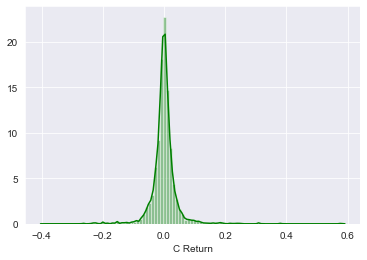

In [160]:
sns.distplot(newData.ix['2008-01-01': '2018-12-31']['C Return'],color = 'g', bins = 100)

# more visualization

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [162]:
import plotly 
import cufflinks as cf
cf.go_offline()

Text(0.5, 1.0, 'Close Price for Each Bank')

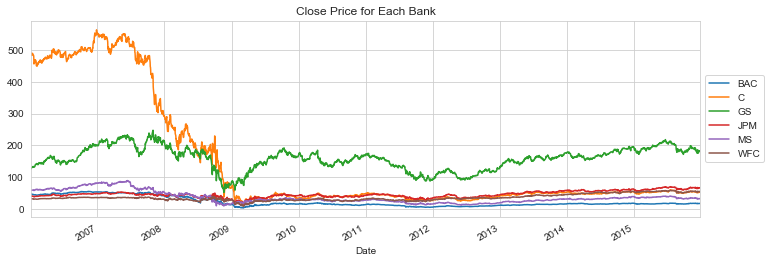

In [179]:
for t in tickers:
    bank_stocks[t]['Close'].plot(figsize=(12,4), label =t)
plt.legend(loc='center left', bbox_to_anchor = (1.0, 0.5))
plt.title('Close Price for Each Bank')

In [184]:
bank_stocks.head(2)

Bank Ticker        BAC                                               \
Stock Info         High        Low       Open      Close      Volume   
Date                                                                   
2006-01-03    47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04    47.240002  46.450001  47.000000  46.580002  17757900.0   

 Bank Ticker                      C                                      ...  \
Stock Info    Adj Close        High         Low        Open       Close  ...   
Date                                                                     ...   
2006-01-03    35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04    34.923801  491.000000  483.500000  488.600006  483.799988  ...   

 Bank Ticker         MS                                      WFC          \
Stock Info         Open      Close     Volume  Adj Close    High     Low   
Date                                                                       
2006-01-03    57.169998  58.310001  5377000.0  37.429329  31.975  31.195   
2006-01-04    58.700001  58.349998  7977800.0  37.455013  31.820  31.365   

 Bank Ticker                                               
Stock Info         Open      Close      Volume  Adj Close  
Date                                                       
2006-01-03    31.600000  31.900000  11016400.0  20.408512  
2006-01-04    31.799999  31.530001  10870000.0  20.171795  

[2 rows x 36 columns]

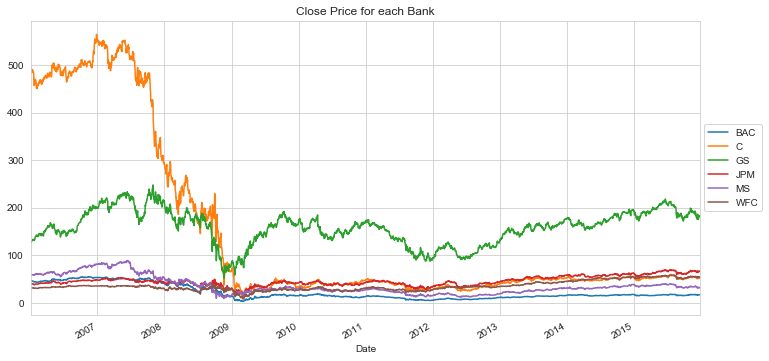

In [199]:
bank_stocks.xs(key='Close', level='Stock Info', axis =1).plot(figsize=(12,6))
plt.title('Close Price for each Bank')
plt.legend(loc='center right', bbox_to_anchor= (1.1, 0.5))

In [200]:
bank_stocks.xs(key='Close', level='Stock Info', axis =1).iplot()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



Text(0.5, 1.0, 'rolling 30 day average against the Close Price for BAC stock')

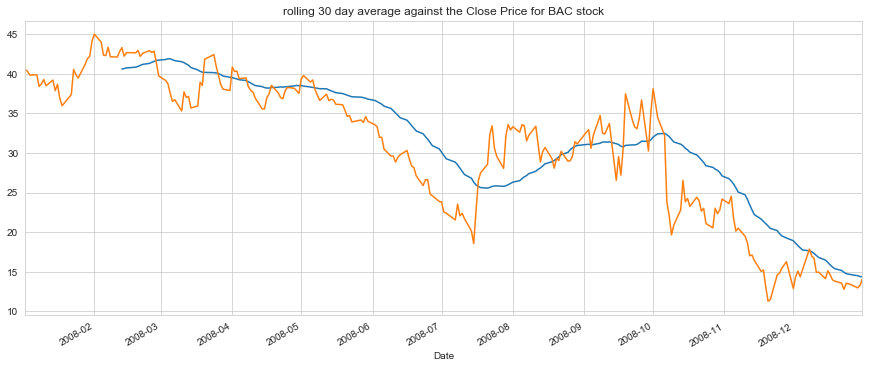

In [221]:
plt.figure(figsize = (15,6))
BAC['Close'].ix['2008-01-01':'2008-12-31'].rolling(window = 30).mean().plot()
BAC['Close'].ix['2008-01-01':'2008-12-31'].plot()
plt.title('rolling 30 day average against the Close Price for BAC stock')

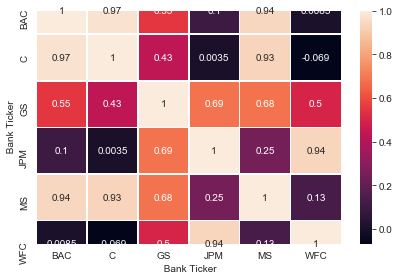

In [239]:
sns.heatmap(bank_stocks.xs(key='Close', level = 'Stock Info', axis =1 ).corr(), lw=0.5, annot=True)
plt.tight_layout()

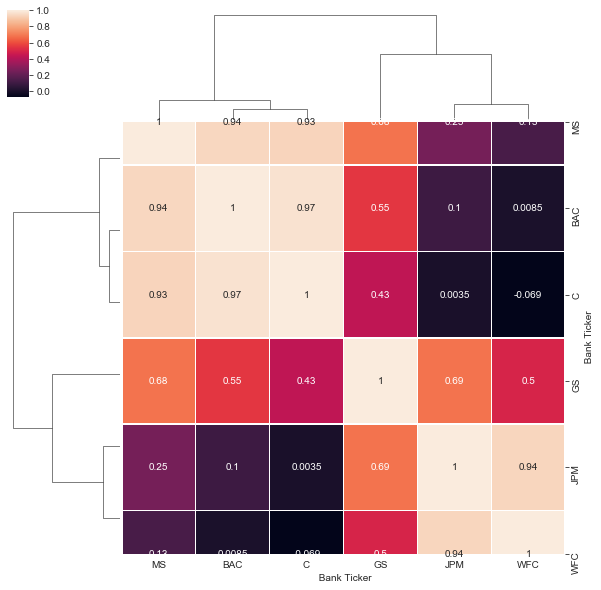

In [241]:
sns.clustermap(bank_stocks.xs(key='Close', level = 'Stock Info', axis =1 ).corr(), lw=0.5, annot=True)

In [243]:
BAC[['Open', 'High', 'Low', 'Close']].ix['2015-01-01':'2016-01-01'].iplot()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



In [244]:
MS['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



In [245]:
BAC['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



In [246]:
20*359


7180

In [247]:
4000/390

10.256410256410257

In [248]:
9.9*389

3851.1000000000004